In [1]:
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from typing import Tuple,Dict,List
from helperfunctions import find_classes,show_random_image,show_batch_images

In [2]:
target_dir = pathlib.Path('data/pizza_steak_sushi/train/')
class_names_found = sorted([item.name for item in target_dir.glob('*')])
class_names_found

['pizza', 'steak', 'sushi']

In [3]:
find_classes('data/pizza_steak_sushi/train/')

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [4]:
class ImageFolderCustom(Dataset):
    """castom dataset"""
    def __init__(self, targ_dir:str, transform=None):
        """inetialize the dataset"""
        self.paths = list(pathlib.Path(targ_dir).glob('*/*'))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)

    def load_image(self, index:int)->Image.Image:
        """load image"""
        img_path = self.paths[index]
        return Image.open(img_path)
    
    def __len__(self):
        """return len of dataset"""
        return len(self.paths)
    
    def __getitem__(self, index:int)->Tuple[torch.Tensor, int]:
        """return tensor and label"""
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx


In [5]:
#create a transform
train_transform = transforms.Compose([

    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(30),
    transforms.TrivialAugmentWide(num_magnitude_bins=3),
    transforms.ToTensor()
])
test_transform = transforms.Compose([

    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [6]:
train_dir = 'data/pizza_steak_sushi/train/'
test_dir = 'data/pizza_steak_sushi/test/'

In [7]:
from torchvision.datasets import ImageFolder
train_data = ImageFolder(train_dir,transform=train_transform)
test_data = ImageFolder(test_dir,transform=test_transform)
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train/
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                RandomVerticalFlip(p=0.5)
                RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
                TrivialAugmentWide(num_magnitude_bins=3, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test/
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [8]:
train_data.classes, train_data.class_to_idx, test_data.classes, test_data.class_to_idx

(['pizza', 'steak', 'sushi'],
 {'pizza': 0, 'steak': 1, 'sushi': 2},
 ['pizza', 'steak', 'sushi'],
 {'pizza': 0, 'steak': 1, 'sushi': 2})

In [9]:
len(train_data), len(test_data)

(225, 75)

In [10]:
train_data

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train/
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               TrivialAugmentWide(num_magnitude_bins=3, interpolation=InterpolationMode.NEAREST, fill=None)
               ToTensor()
           )

In [11]:
test_data

Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test/
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

img shape: torch.Size([3, 64, 64])
label: sushi


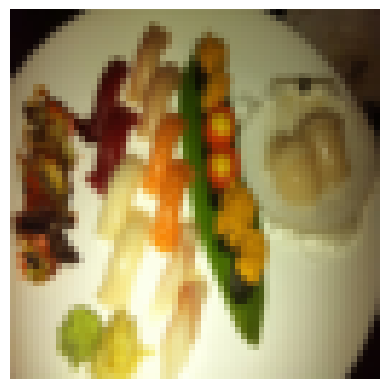

img shape: torch.Size([3, 64, 64])
label: sushi


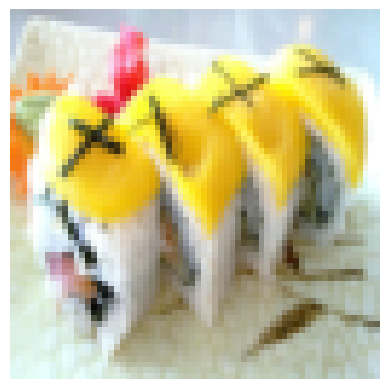

img shape: torch.Size([3, 64, 64])
label: sushi


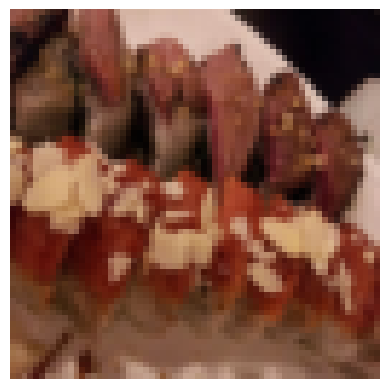

img shape: torch.Size([3, 64, 64])
label: pizza


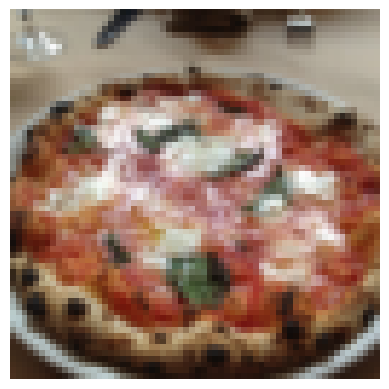

img shape: torch.Size([3, 64, 64])
label: sushi


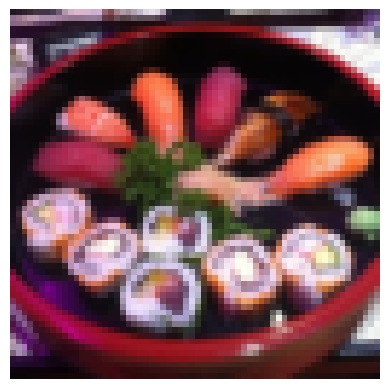

In [12]:
show_batch_images(test_data, classes=test_data.classes, n=5, display_shape=True)

In [13]:
#setup data loaders
BATCH_SIZE = 32
NUM_WORKERS = 16
train_dataloader_castom = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True,num_workers=NUM_WORKERS)
test_dataloader_castom = DataLoader(test_data,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)
train_dataloader_castom, test_dataloader_castom

(<torch.utils.data.dataloader.DataLoader at 0x1e57f6efbe0>,
 <torch.utils.data.dataloader.DataLoader at 0x1e57f50f400>)

In [14]:
len(train_dataloader_castom), len(test_dataloader_castom)

(8, 3)

In [15]:
#get imge and label from dataloader
images, labels = next(iter(train_dataloader_castom))

In [16]:
images.shape, labels.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

img shape: torch.Size([3, 64, 64])
label: pizza


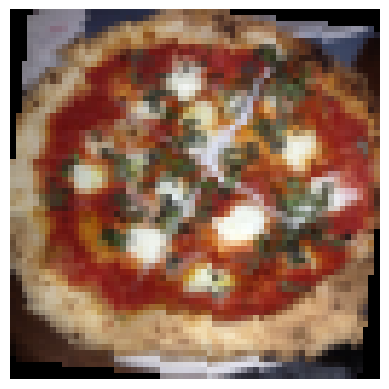

img shape: torch.Size([3, 64, 64])
label: sushi


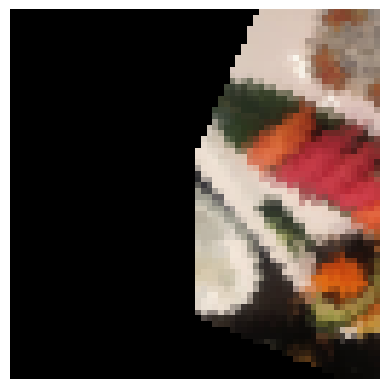

img shape: torch.Size([3, 64, 64])
label: pizza


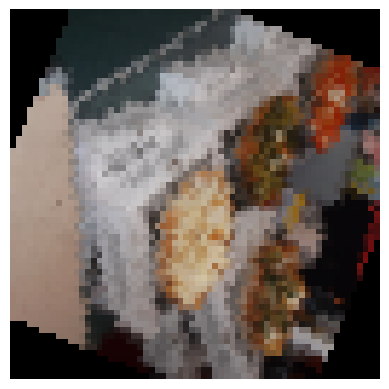

img shape: torch.Size([3, 64, 64])
label: sushi


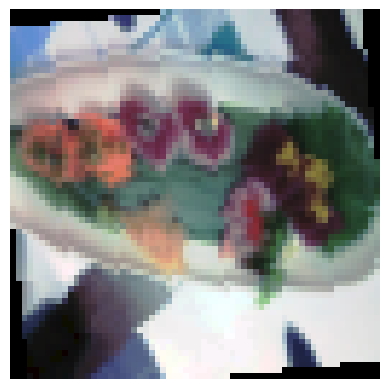

img shape: torch.Size([3, 64, 64])
label: steak


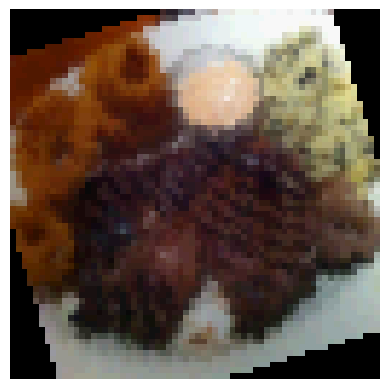

In [17]:
#data argmentation
show_batch_images(train_data, classes=train_data.classes, n=5, display_shape=True)

In [18]:
import torch as nn
from torch import nn

In [19]:
device = torch.device('cuda')


In [24]:
#create tiny vgg
class TinyVgg(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0
                      ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0
                      ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                        out_channels=hidden_units*2,
                        kernel_size=3,
                        stride=1,
                        padding=0
                        ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units*2,
                        out_channels=hidden_units*2,
                        kernel_size=3,
                        stride=1,
                        padding=0
                        ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*2*13*13,
                        out_features=output_shape)
        )
    def forward(self,x):    
        x= x.to(device)
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

        return self.classifier(self.conv_block_2(self.conv_block_1(x)))


In [21]:
# class TinyVgg(nn.Module):
#     def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
#         super().__init__()
#         self.conv_block_1 = nn.Sequential(
#             nn.Conv2d(in_channels=input_shape,
#                       out_channels=hidden_units,
#                       kernel_size=3,
#                       stride=1,
#                       padding=1
#                      ),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=hidden_units,
#                       out_channels=hidden_units,
#                       kernel_size=3,
#                       stride=1,
#                       padding=1
#                      ),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2)
#         )
#         self.conv_block_2 = nn.Sequential(
#             nn.Conv2d(in_channels=hidden_units,
#                       out_channels=hidden_units*2,
#                       kernel_size=3,
#                       stride=1,
#                       padding=1
#                      ),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=hidden_units*2,
#                       out_channels=hidden_units*2,
#                       kernel_size=3,
#                       stride=1,
#                       padding=1
#                      ),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2)
#         )
#         self.classifier = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(64 * 8 * 8, 256),
#             nn.BatchNorm1d(256),
#             nn.ReLU(),
#             nn.Dropout(0.5),
#             nn.Linear(256, output_shape)
#         )

#     def forward(self, x):    
#         x = self.conv_block_1(x)
#         print(x.shape)
#         x = self.conv_block_2(x)
#         print(x.shape)
#         x = self.classifier(x)
#         print(x.shape)
#         return x
    
#         return self.classifier(self.conv_block_2(self.conv_block_1(x)))



In [21]:
device = 'cuda' 

In [22]:
device

'cuda'

In [23]:
output_shape=len(class_names_found)
output_shape

3

In [25]:
!nvidia-smi

Sun May 14 06:25:40 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.68                 Driver Version: 531.68       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 L...  WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   50C    P8                9W /  N/A|   4458MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [25]:
model_0 = TinyVgg(
input_shape=3,
output_shape=len(class_names_found)
)

In [33]:
model_0

TinyVgg(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=21632, out_features=3, bias=True)
  )
)

In [34]:
model_0.to(device)

TinyVgg(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=21632, out_features=3, bias=True)
  )
)

In [36]:
from torchinfo import summary

In [38]:

summary(model_0, input_size=(1,3, 64, 64), device=device)

c:\Users\rifat\AppData\Local\Programs\Python\Python310\lib\site-packages\torchinfo\torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),


Layer (type:depth-idx)                   Output Shape              Param #
TinyVgg                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 64, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 64, 62, 62]           1,792
│    └─ReLU: 2-2                         [1, 64, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 64, 60, 60]           36,928
│    └─ReLU: 2-4                         [1, 64, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 64, 30, 30]           --
├─Sequential: 1-2                        [1, 128, 13, 13]          --
│    └─Conv2d: 2-6                       [1, 128, 28, 28]          73,856
│    └─ReLU: 2-7                         [1, 128, 28, 28]          --
│    └─Conv2d: 2-8                       [1, 128, 26, 26]          147,584
│    └─ReLU: 2-9                         [1, 128, 26, 26]          --
│    └─MaxPool2d: 2-10                   [1, 128, 13, 13]          --

In [28]:
import torch

In [29]:
dummy=torch.randn(1,3,64,64)

In [30]:
dummy.to(device)

tensor([[[[ 1.3257e+00,  1.6167e+00, -1.0724e+00,  ..., -9.4603e-01,
            8.0191e-02,  2.5830e-01],
          [-5.2977e-01,  9.5075e-01, -2.3607e+00,  ...,  6.6545e-01,
            1.1491e+00, -9.5414e-01],
          [-3.5994e-02,  3.4144e-01,  4.9727e-02,  ...,  9.8570e-01,
            5.0022e-01,  2.7167e-01],
          ...,
          [ 6.7012e-01, -9.0459e-01,  1.2902e+00,  ...,  9.4819e-01,
           -2.9295e-02,  4.8049e-01],
          [ 8.5814e-01,  3.2332e-01, -3.6906e-01,  ...,  9.0164e-01,
            1.1020e+00,  1.9871e+00],
          [ 9.2430e-01,  1.2112e+00,  6.1156e-01,  ...,  7.6543e-01,
            3.4749e-02, -8.6647e-01]],

         [[-1.2086e+00,  1.9293e+00, -1.4353e+00,  ...,  1.4856e-01,
            5.3941e-01, -1.2088e+00],
          [-2.8900e-02, -5.2085e-01, -1.1380e+00,  ...,  4.9901e-01,
           -5.1619e-01,  2.0560e-01],
          [ 2.9543e+00,  2.8571e-01,  8.6477e-01,  ..., -1.6884e-01,
            3.4172e-01,  2.8294e-01],
          ...,
     

In [31]:
model_0(dummy)

tensor([[-0.0050, -0.0018, -0.0281]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [32]:
import torchinfo

In [33]:
from torchinfo import summary
summary(model=model_0,input_size=(32,3,64,64))

c:\Users\rifat\AppData\Local\Programs\Python\Python310\lib\site-packages\torchinfo\torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),


Layer (type:depth-idx)                   Output Shape              Param #
TinyVgg                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 64, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 64, 62, 62]          1,792
│    └─ReLU: 2-2                         [32, 64, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 64, 60, 60]          36,928
│    └─ReLU: 2-4                         [32, 64, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 64, 30, 30]          --
├─Sequential: 1-2                        [32, 128, 13, 13]         --
│    └─Conv2d: 2-6                       [32, 128, 28, 28]         73,856
│    └─ReLU: 2-7                         [32, 128, 28, 28]         --
│    └─Conv2d: 2-8                       [32, 128, 26, 26]         147,584
│    └─ReLU: 2-9                         [32, 128, 26, 26]         --
│    └─MaxPool2d: 2-10                   [32, 128, 13, 13]         --

In [34]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [35]:
device

'cuda'

In [36]:
#create a  simple transform 
simple_transform = transforms.Compose([

    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [37]:
from torchvision import datasets
train_data_sample = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_sample = datasets.ImageFolder(root=test_dir,
                                         transform=simple_transform)

#turn dtaset into dataloader
import os
from torch.utils.data import DataLoader
#setup hyper-prameter

BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()
train_dataloader_simple = DataLoader(dataset=train_data_sample,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS,shuffle=True)
test_dataloader_simple = DataLoader(dataset=test_data_sample,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS,shuffle=False)

In [38]:
#create a train step 
def train_step (model:torch.nn.Module,
                dataloader:torch.utils.data.DataLoader,
                loss_fn:torch.nn.Module,
                optimizer):
    #put the model in train mode
    train_loss ,train_acc =0,0
    for batch ,(x,y) in enumerate (dataloader):
        #send data to targate device
        x,y =x.to(device),y.to(device)
        y_pred = model_0(x)
        loss = loss_fn(y_pred,y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #calculate the acuracy

        y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)

        train_acc = (y_pred_class==y).sum().item()/len(y_pred)

#adjust matrics 

    train_loss = train_loss/len(dataloader)
    train_acc = train_acc / len(dataloader)

    return train_loss ,train_acc







In [39]:
#crete a test step 
def test_step (model:torch.nn.Module,
                dataloader:torch.utils.data.DataLoader,
                loss_fn:torch.nn.Module):
    #put mdel in eval() mode

    model.eval()

    #test loss and test acc

    with torch.inference_mode():
        #loop throgh dataloader
        for batch ,(x,y) in enumerate (dataloader):
            #send data to targate device
            x,y =x.to(device),y.to(device)

            test_pred_logits = model(x)
            loss = loss_fn(test_pred_logits,y)
            test_loss += loss.item()
            test_pred_labels = torch.argmax(torch.softmax(test_pred_logits,dim=1),dim=1)
            test_acc += (test_pred_labels==y).sum().item()/len(test_pred_labels)

    #adjust metric
    test_loss = test_loss/len(dataloader)
    test_acc = test_acc / len(dataloader)

    return test_loss ,test_acc    

        

In [43]:
def test_step(model, dataloader, loss_fn):
    model.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            test_pred_logits = model(x)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            test_pred_labels = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)
            test_acc += (test_pred_labels == y).sum().item() / len(test_pred_labels)
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    return test_loss, test_acc


In [40]:
#create a train function
from tqdm.auto import tqdm
from torch.utils.tensorboard import SummaryWriter
#crete 

def train(model:torch.nn.Module,
                train_dataloader:DataLoader,
                test_dataloader:DataLoader,
                optimizer,
                loss_fn:torch.nn.Module=nn.CrossEntropyLoss(),
                epochs:int =5,
                device=device,
                log_dir:str = 'logs'):
    

    # create a SummaryWriter object for logging
    writer = SummaryWriter(log_dir=log_dir)    

    results = {


        'train_loss':[],
        'train_acc':[],
        'test_loss': [],
        'test_acc':[]
    }



    #loop
    for epoch in tqdm(range(epochs)):
        train_loss ,train_acc =train_step(model=model,dataloader=train_dataloader_simple,loss_fn=loss_fn,optimizer=optimizer)
        test_loss ,test_acc =test_step(model=model,dataloader=train_dataloader_simple,loss_fn=loss_fn)
        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)

        print(f'Epoch:{epoch+1}/{epochs},train_loss:{train_loss:.4f},train_acc:{train_acc:.4f},test_loss:{test_loss:.4f},test_acc:{test_acc:.4f}')


        #update the model

        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)

    # close the SummaryWriter object to flush the data to disk
    writer.close()
        
    #return the model and results
    return results


In [41]:
from timeit import default_timer as timer

In [44]:
NUM_EPOCH=2
#setup the model
model_0 = TinyVgg(
input_shape=3,
hidden_units=64,
output_shape=len(class_names_found)
).to(device)

#setup loss and optimizer
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model_0.parameters(),lr=0.001)


start = timer()
#train_model
results = train(model=model_0,
                train_dataloader=train_dataloader_simple,
                test_dataloader=test_dataloader_simple,
                optimizer=optimizer,
                loss_fn=loss_fn,
                epochs=NUM_EPOCH,
                device=device)
end = timer()
print(f'Time taken to train the model:{(end-start)/60:.2f} minutes')


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch:1/2,train_loss:1.1141,train_acc:0.0000,test_loss:1.0947,test_acc:0.5898
Epoch:2/2,train_loss:1.0878,train_acc:0.0000,test_loss:1.1068,test_acc:0.3047
Time taken to train the model:0.45 minutes


In [102]:
torch.save(model_0.state_dict(), 'model_0.pt')

In [105]:
#create a transform with data augmentation
train_transforms_trivial = transforms.Compose([

    transforms.Resize((64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()])
test_transforms_trivial = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [106]:
#create a dataset
train_dataset_trivial = datasets.ImageFolder(root=train_dir,transform=train_transforms_trivial)
test_dataset_trivial = datasets.ImageFolder(root=test_dir,transform=test_transforms_trivial)

In [107]:
NUM_EPOCH=15
#setup the model
model_0 = TinyVgg(
input_shape=3,
hidden_units=64,
output_shape=len(class_names_found)
).to(device)

#setup loss and optimizer
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model_0.parameters(),lr=0.001)


start = timer()
#train_model
results = train(model=model_0,
                train_dataloader=train_dataset_trivial,
                test_dataloader=test_dataset_trivial,
                optimizer=optimizer,
                loss_fn=loss_fn,
                epochs=NUM_EPOCH,
                device=device)
end = timer()
print(f'Time taken to train the model:{(end-start)/60:.2f} minutes')


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch:1/15,train_loss:1.1068,train_acc:0.1250,test_loss:1.0620,test_acc:0.4336
Epoch:2/15,train_loss:1.0520,train_acc:0.1250,test_loss:1.0745,test_acc:0.4141
Epoch:3/15,train_loss:1.0763,train_acc:0.1250,test_loss:0.9973,test_acc:0.4141
Epoch:4/15,train_loss:0.9918,train_acc:0.0000,test_loss:0.9157,test_acc:0.5430
Epoch:5/15,train_loss:0.8713,train_acc:0.1250,test_loss:0.9826,test_acc:0.6133
Epoch:6/15,train_loss:0.9039,train_acc:0.1250,test_loss:1.0292,test_acc:0.4766
Epoch:7/15,train_loss:1.0238,train_acc:0.0000,test_loss:0.8422,test_acc:0.6484
Epoch:8/15,train_loss:0.9149,train_acc:0.1250,test_loss:1.0472,test_acc:0.5312
Epoch:9/15,train_loss:0.8767,train_acc:0.1250,test_loss:0.8375,test_acc:0.5586
Epoch:10/15,train_loss:0.8016,train_acc:0.1250,test_loss:0.8658,test_acc:0.6055
Epoch:11/15,train_loss:0.7091,train_acc:0.1250,test_loss:0.8223,test_acc:0.5703
Epoch:12/15,train_loss:0.6949,train_acc:0.1250,test_loss:0.8350,test_acc:0.6797
Epoch:13/15,train_loss:0.6715,train_acc:0.1250,te

In [110]:
import torchvision

In [142]:
from torchvision import transforms
from PIL import Image

# Load the input image
c_i = Image.open("C:/learning/is_sushi_healthy_732x549_thumb-732x549.jpg")

In [143]:
# Define the transformation pipeline
c_i_transformed = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])


In [144]:
c_i = c_i_transformed(c_i)


In [145]:
c_i

tensor([[[0.2980, 0.3294, 0.2510,  ..., 0.1922, 0.2431, 0.2235],
         [0.2667, 0.3176, 0.2627,  ..., 0.1882, 0.2000, 0.2000],
         [0.2353, 0.3059, 0.2549,  ..., 0.1765, 0.1608, 0.1647],
         ...,
         [0.7490, 0.6706, 0.3333,  ..., 0.4392, 0.5765, 0.7843],
         [0.6980, 0.5020, 0.4275,  ..., 0.4784, 0.4706, 0.7804],
         [0.6275, 0.5294, 0.6353,  ..., 0.6784, 0.3451, 0.6745]],

        [[0.2980, 0.3294, 0.2588,  ..., 0.2078, 0.2627, 0.2392],
         [0.2824, 0.3255, 0.2706,  ..., 0.2000, 0.2196, 0.2196],
         [0.2549, 0.3176, 0.2667,  ..., 0.1882, 0.1882, 0.1922],
         ...,
         [0.8078, 0.7255, 0.3647,  ..., 0.4667, 0.6078, 0.8000],
         [0.7490, 0.5569, 0.4706,  ..., 0.5059, 0.4941, 0.8000],
         [0.6824, 0.5843, 0.6863,  ..., 0.6941, 0.3686, 0.7020]],

        [[0.2706, 0.3020, 0.2314,  ..., 0.1843, 0.2392, 0.2157],
         [0.2471, 0.2980, 0.2431,  ..., 0.1765, 0.1922, 0.1961],
         [0.2235, 0.2863, 0.2431,  ..., 0.1647, 0.1608, 0.

In [158]:
model_0(c_i.unsqueeze(0).to(device))

tensor([[ 0.0132, -2.3195,  0.6753]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [159]:
c_i.pred_prob = torch.softmax(model_0(c_i.unsqueeze(0).to(device)),dim=1)

In [162]:
c_i_pred_label = torch.argmax(c_i.pred_prob,dim=1)
c_i_pred_label

tensor([2], device='cuda:0')

In [163]:
class_names_found[c_i_pred_label]

'sushi'

In [166]:
#puting castom image functio
def predict_image(model:torch.nn.Module,
                class_names:list,
                img:Image.Image,
                transforms:torchvision.transforms.Compose):
    model.eval()
    img = transforms(img)
    img = img.unsqueeze(0)
    pred_probs = torch.softmax(model(img.to(device)),dim=1)
    pred_label = torch.argmax(pred_probs,dim=1)
    return class_names[pred_label],pred_probs[0][pred_label].item()

In [169]:
castom_image = Image.open("Ohayo-Valley.jpg")
prediction=predict_image(model=model_0,
                class_names=class_names_found,
                img=castom_image,
                transforms=c_i_transformed)

In [170]:
prediction

('pizza', 0.5134593844413757)

In [160]:
c_i.pred_prob

tensor([[0.3294, 0.0320, 0.6386]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [147]:
class_names_found[2]

'sushi'

In [148]:
#read an castom image
import torchvision
castom_image = torchvision.io.read_image('C:/learning/is_sushi_healthy_732x549_thumb-732x549.jpg')

In [155]:
castom_image.shape

torch.Size([3, 549, 732])

In [154]:
model_0(castom_image.unsqueeze(0).to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [96]:
results

{'train_loss': [1.103209838271141,
  1.103209838271141,
  1.0012883245944977,
  1.0012883245944977,
  0.9361769482493401,
  0.9361769482493401,
  0.9399877414107323,
  0.9399877414107323,
  0.8844051882624626,
  0.8844051882624626,
  0.9377520382404327,
  0.9377520382404327,
  0.8998778015375137,
  0.8998778015375137,
  0.8026490835472941,
  0.8026490835472941,
  0.8649983182549477,
  0.8649983182549477,
  0.7727481313049793,
  0.7727481313049793],
 'train_acc': [0.125,
  0.125,
  0.125,
  0.125,
  0.125,
  0.125,
  0.125,
  0.125,
  0.0,
  0.0,
  0.0,
  0.0,
  0.125,
  0.125,
  0.125,
  0.125,
  0.125,
  0.125,
  0.125,
  0.125],
 'test_loss': [1.068641185760498,
  1.068641185760498,
  0.9919124096632004,
  0.9919124096632004,
  1.0841472670435905,
  1.0841472670435905,
  0.7986775636672974,
  0.7986775636672974,
  0.8216793313622475,
  0.8216793313622475,
  0.8764236196875572,
  0.8764236196875572,
  0.9595507308840752,
  0.9595507308840752,
  0.9052050039172173,
  0.9052050039172173

In [ ]:
#create tinyvgg modelclass


In [ ]:


import os


In [ ]:
128*16*16

32768

In [ ]:
32768*3

98304